# Assignment 1-b: Deep Learning Hello World! (3-layer MLP)

Objective: To be able to improve upon the basic MLP in part 1 by adding more layers for MNIST Classification

Step 1: Taking care of the imports which includes numpy, datasets, models, layers, optimizers, and utils. <br />
You will also be able to tell if your set-up is correct/complete.

In [24]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

from matplotlib import pyplot as plt
%matplotlib inline

Step 2: Set-up some constants to be utilized in the training/testing of the model <br\>
Note: the number of epochs (NB_EPOCH) is reduced to 20

In [25]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits, i.e. 0,1,2,3,4,5,6,7,8,9
OPTIMIZER = SGD() # Stocastic Gradient Descent optimizer
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN dataset is reserved for VALIDATION

np.random.seed(1983)  # for reproducibility

Step 3: Load the MNIST Dataset which are shuffled and split between train and test sets <br\>
- X_train is 60000 rows of 28x28 values
- X_test is 10000 rows of 28x28 values

First 100 train images:


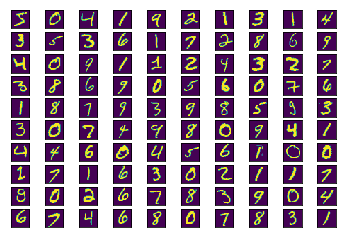

In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("First 100 train images:")
for k in range(100):
    plt.subplot(10, 10, k+1)      
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.imshow(X_train[k])

Step 4: Preprocess the input data by reshaping it, converting it to float, and normalizing it [0-1].

In [27]:
# reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


Step 5: Convert class vectors to binary class matrices; One-Hot-Encoding (OHE)

In [28]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

Step 6: Create the model with 3 layers: Input:784 ==> Hidden:128 ==> Hidden:128 ==> Output:10 (with Softmax activation)

In [30]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Step 7: Compile the model with categorical_crossentropy loss function, SGD optimizer, and accuracy metric

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

Step 8: Perform the training with 128 batch size, 200 epochs, and 20 % of the train data used for validation

In [33]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s - loss: 1.4286 - acc: 0.6594 - val_loss: 0.7242 - val_acc: 0.8373
Epoch 2/20
48000/48000 [==============================] - 2s - loss: 0.5890 - acc: 0.8547 - val_loss: 0.4472 - val_acc: 0.8845
Epoch 3/20
48000/48000 [==============================] - 2s - loss: 0.4366 - acc: 0.8833 - val_loss: 0.3698 - val_acc: 0.8998
Epoch 4/20
48000/48000 [==============================] - 2s - loss: 0.3782 - acc: 0.8947 - val_loss: 0.3317 - val_acc: 0.9073
Epoch 5/20
48000/48000 [==============================] - 3s - loss: 0.3455 - acc: 0.9022 - val_loss: 0.3088 - val_acc: 0.9128
Epoch 6/20
48000/48000 [==============================] - 3s - loss: 0.3228 - acc: 0.9078 - val_loss: 0.2929 - val_acc: 0.9167
Epoch 7/20
48000/48000 [==============================] - 2s - loss: 0.3054 - acc: 0.9124 - val_loss: 0.2803 - val_acc: 0.9194
Epoch 8/20
48000/48000 [==============================] - 3s 

Step 9: Evaluate the model on the test dataset (10,000 images)

In [34]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9088/10000 [==========================>...] - ETA: 0s
Test score: 0.193726402299
Test accuracy: 0.9456


[Optional] Step 10: Save the model (serialized) to JSON

In [35]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  04:28 PM    <DIR>          .
09/17/2017  04:28 PM    <DIR>          ..
09/17/2017  01:51 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  01:16 PM            50,073 DeepLearningHelloWorld.ipynb
09/17/2017  04:28 PM            83,748 DeepLearningHelloWorldPart2.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  01:07 PM            42,528 model.h5
09/17/2017  04:30 PM             1,875 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               4 File(s)        178,224 bytes
               8 Dir(s)  199,338,438,656 bytes free


[Optional] Step 11: Save the model weights

In [36]:
model.save_weights("model.h5")
%ls

 Volume in drive C is Windows
 Volume Serial Number is 7252-C405

 Directory of C:\Users\cobalt\workspace

09/17/2017  04:30 PM    <DIR>          .
09/17/2017  04:30 PM    <DIR>          ..
09/17/2017  01:51 PM    <DIR>          .ipynb_checkpoints
01/07/2017  12:22 PM    <DIR>          .metadata
09/17/2017  01:16 PM            50,073 DeepLearningHelloWorld.ipynb
09/17/2017  04:30 PM            56,494 DeepLearningHelloWorldPart2.ipynb
01/08/2017  10:52 AM    <DIR>          Hello
01/08/2017  10:52 AM    <DIR>          Hellocpp11
01/09/2017  04:45 PM    <DIR>          HelloOpenCV
09/17/2017  04:31 PM           490,640 model.h5
09/17/2017  04:30 PM             1,875 model.json
01/07/2017  12:22 PM    <DIR>          RemoteSystemsTempFiles
               4 File(s)        599,082 bytes
               8 Dir(s)  199,338,012,672 bytes free


[Optional] Step 12: Load the saved model

In [37]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")

[Optional] Step 13: Compile and evaluate loaded model

In [38]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

 9600/10000 [===========================>..] - ETA: 0s
Test score: 0.193726402299
Test accuracy: 0.9456
